# Homework 1: Numpy, Scipy, Pandas

### Due Friday Sept 9, 2016 @ 9am


## #0: Get set up with your environment to work on and submit homework

a. Create a new homework repository at github

<img src="https://www.evernote.com/l/AUX8wzRzuFJMB53yGp1CR3ouUojjUvrR7FEB/image.png">

Name your repo something sensible (e.g. python-ay250-homeworks). Given your Berkeley affiliation you should be able to get private repos if you'd like.

<img src="https://www.evernote.com/l/AUV3Z6iVPuBN_Z6LUDZ6zBi-nmC3UQwer9gB/image.png">


b. Clone this repo locally and make a directory for this week's homework:

```bash
git clone https://github.com/profjsb/python-ay250-homework.git
cd /class/directories ## this will be different on your machine
cd python-ay250-homework
mkdir hw_1
echo "hw_1 README" >> hw_1/README.md
git add hw_1/README.md
git commit hw_1/README.md -m "added hw_1 directory"
git push
```

c. Copy this notebook into your `hw_1` folder from a local version of the python-seminar repo

```bash
cd /class/directories
git clone https://github.com/profjsb/python-seminar.git 
cd python-seminar
git pull
cp Homeworks/hw_1/* /class/directories/python-ay250-homework/hw_1/
```

d. Get working! Be sure to check in your work as often as you'd like

```bash
cd /class/directories/python-ay250-homework
git add hw_1/<whatever>
git commit <whatever> -m "this is a check in"
```

e. To submit your work, send us (prof+GSIs) your github handle and repo name for us to clone (you'll need to add us to the repo if you've made a private one)

## #1:  Super-resolution imaging 

Obtaining several snapshots of the same scene, from microscopes to telescopes, is useful for the postprocessing increase of signal to noise: by summing up imaging data we can effectively beat down the noise. Interestingly, if we image the same scene from different vistas we can also improve the clarity of the combined image. Being able to discern features in a scene from this combination effort is sometimes called super-resolution imaging.

Here, we'll combine about 4 seconds of a shaky video to reveal the statement on a license plate that is not discernable in any one frame.

<img src="data/im2-1.png">

A tarball of the data is at: https://drive.google.com/open?id=0B4vIeCR-xYNnbXFJTTVlVnpUZkk

```bash
tar -xvzf homework1_data.tgz  # do NOT check this files into git...
```

**Problem 1** Read in each image into a `numpy` array. Resize each frame to be 3 times larger in each axis (ie. 9 times larger images). Using `scipy.signal.fftconvolve` find the offsets of each frame with respect to the first frame. Report those offsets to 2 decimal places. 

   - Hint1: you'll need to figure out how to resize a numpy array
   - Hint2: you'll want to reverse the second image when doing the convolution: `scipy.signal.fftconvolve(im1, im2[::-1, ::-1])`
   - Hint3: you'll need to figure out how to identify the peak of the fft convolution to find the offsets between images

In [96]:
!pwd

/Users/kevinli/src/AY-250-Fall2016/HW1


In [97]:
!ls

Input1_0              Input1_0.8            Input1_0.wav
Input1_0.1            Input1_0.9            data
Input1_0.1.wav        Input1_0.9.wav        hw1_data
Input1_0.5            Input1_0.95           hw_0_data
Input1_0.5.wav        Input1_0.95.wav       hw_1_assignment.ipynb
Input1_0.75           Input1_0.99           input1_new
Input1_0.75.wav       Input1_0.99.wav


In [1]:
%pylab inline
from scipy.ndimage import imread

Populating the interactive namespace from numpy and matplotlib


In [123]:
import numpy as np
import scipy as sp
from scipy import signal 
from scipy import misc

In [124]:
!ls data

im2-1.png       merged_data.csv


In [125]:
!ls hw1_data/Data

im2-0.png  im2-22.png im2-36.png im2-5.png  im2-63.png im2-77.png im2-90.png
im2-1.png  im2-23.png im2-37.png im2-50.png im2-64.png im2-78.png im2-91.png
im2-10.png im2-24.png im2-38.png im2-51.png im2-65.png im2-79.png im2-92.png
im2-11.png im2-25.png im2-39.png im2-52.png im2-66.png im2-8.png  im2-93.png
im2-12.png im2-26.png im2-4.png  im2-53.png im2-67.png im2-80.png im2-94.png
im2-13.png im2-27.png im2-40.png im2-54.png im2-68.png im2-81.png im2-95.png
im2-14.png im2-28.png im2-41.png im2-55.png im2-69.png im2-82.png im2-96.png
im2-15.png im2-29.png im2-42.png im2-56.png im2-7.png  im2-83.png im2-97.png
im2-16.png im2-3.png  im2-43.png im2-57.png im2-70.png im2-84.png im2-98.png
im2-17.png im2-30.png im2-44.png im2-58.png im2-71.png im2-85.png im2-99.png
im2-18.png im2-31.png im2-45.png im2-59.png im2-72.png im2-86.png
im2-19.png im2-32.png im2-46.png im2-6.png  im2-73.png im2-87.png
im2-2.png  im2-33.png im2-47.png im2-60.png im2-74.png im2-88.png
im2-20.png im2-34.png im2-48.png

In [133]:
def fig_input(file_name, cmap = cm.Greys):
    tmp = sp.ndimage.imread(file_name, flatten = True)
    imshow(tmp, cmap)
    return tmp

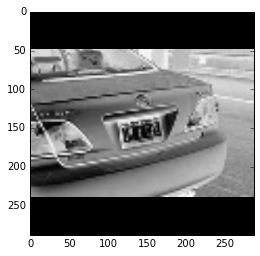

In [134]:
str1 = "hw1_data/Data/im2-1.png"
fig1 = fig_input(str1)

In [135]:
fig1.shape

(288, 288)

In [136]:
288*288

82944

In [137]:
###############################################################
#---------- Automating the collection of all images ----------#
###############################################################
import os
image_dir = "hw1_data/Data"
img_names = [x for x in sorted(os.listdir(image_dir)) if x.startswith("im2-")]
img_paths = [os.path.join(image_dir, x) for x in img_names]

**Problem 2** Shift each image to register the frames to the original (expanded in size) frame. You should, in general, be shifting by subpixel offsets. You might want to look at `scipy.ndimage.interpolation.shift`

In [138]:
from scipy.ndimage import imread
from scipy.ndimage.interpolation import zoom
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve
%pylab inline

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [139]:
scipy.ndimage?

Object `scipy.ndimage` not found.


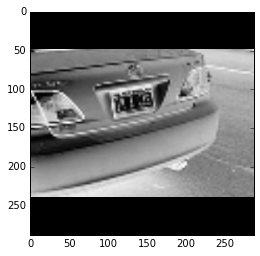

In [140]:
########################################################################
#----- Allocating Arrays for Resized Figures and threshold images -----#
########################################################################
fig1 = fig_input("hw1_data/Data/im2-2.png")
ori_size = fig1.shape
resized = np.empty((len(img_paths), ori_size[0]*3, ori_size[1]*3))
thresholded = np.empty((len(img_paths), ori_size[0]*3, ori_size[1]*3))
for i, (img_name, img_path) in enumerate(zip(img_names, img_paths)):
    #print(i)
    ##############################################
    #------ Task 1: Resizing all photos ---------#
    ##############################################
    resized[i] = zoom(sp.ndimage.imread(img_path, flatten = True), 3)
    #-------------------- Thresholding ------------------#
    # We will threshold the images s.t. 1/2 of the image is dark.
    # W/O the thresholding, the correlation will always be the highest at 
    # the center of the image
    tmp = resized[i].copy()
    tmp[:150] = 0
    tmp[715:] = 0
    tmp[tmp <= np.percentile(tmp[150:715].ravel(), 50)] = 0
    thresholded [i] = tmp

In [141]:
def shift(im, im_base):
    '''The function computes the offset between 2 images'''
    corr = fftconvolve(im_base[::-1, ::-1], im, mode = 'full')
    # Finding the index of the highest correlation
    idx = np.unravel_index(np.abs(corr.argmax()), corr.shape)
    #print(idx)
    # Computing the offset
    origin = np.array(corr.shape)/2
    offset = idx - origin
    return offset

**Problem 3** Combine all the registered images to form a super-resolution image. What does the license plate read?

In [142]:
offsets = -np.array([shift(im, thresholded[0]) for im in thresholded], dtype = 'f8')
np.set_printoptions(formatter = {'float': lambda x: "% 7.2f" %x})
print(offsets)


[[   0.50    0.50]
 [   8.50  -38.50]
 [ 104.50   -7.50]
 [  57.50 -165.50]
 [  63.50  -22.50]
 [  25.50 -103.50]
 [  56.50   -7.50]
 [ 177.50  -18.50]
 [ 114.50   33.50]
 [  56.50  -72.50]
 [ 107.50  -95.50]
 [  41.50  -22.50]
 [ 122.50   -6.50]
 [ -47.50  -80.50]
 [  79.50 -108.50]
 [  48.50  -96.50]
 [  16.50 -106.50]
 [ 113.50  -62.50]
 [ 121.50  -61.50]
 [   0.50 -166.50]
 [  46.50   49.50]
 [  52.50   57.50]
 [ 138.50    0.50]
 [ 178.50   33.50]
 [  81.50 -126.50]
 [ 114.50   88.50]
 [  82.50   17.50]
 [ 169.50  -56.50]
 [  -0.50 -111.50]
 [ 105.50    0.50]
 [ 158.50   64.50]
 [  99.50   50.50]
 [  56.50  -43.50]
 [  45.50  136.50]
 [   0.50    2.50]
 [  81.50   -7.50]
 [ 113.50   -1.50]
 [  92.50   13.50]
 [  80.50  -23.50]
 [  62.50   10.50]
 [   8.50 -147.50]
 [  50.50  -89.50]
 [  81.50  -98.50]
 [ 137.50   29.50]
 [ 138.50   -4.50]
 [   7.50   33.50]
 [ 130.50    8.50]
 [  57.50  -57.50]
 [  67.50 -141.50]
 [   0.50  -30.50]
 [  88.50 -136.50]
 [  65.50  -35.50]
 [ -12.50   

In [26]:
#------ Shifting the original (unthresholded but zoomed) imaged ------#
im_shift = sp.ndimage.interpolation.shift
shifted = np.array([im_shift(im, offset) for im, offset in zip(resized, offsets)])

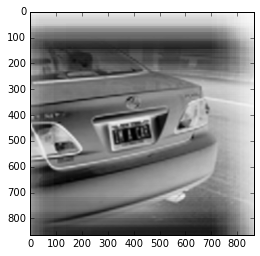

In [27]:
#------ Combining all images to form a Super-resolution image -------#
sr_img = np.mean(shifted, axis = 0)
plt.imshow(sr_img, cmap = cm.Greys)

#### Answer:
"I'm a car" 

# #2: An elementary introduction to spectral audio compression

In this problem, we'll explore the very basics of audio compression in the spectral domain using numpy and scipy. We'll do a bit of visualization with matplotlib, but since that is covered later in the course, we'll provide those functions for you.

Audio compression is a large and complex topic, and the design of a format for compressed audio such as the popular [MP3](http://en.wikipedia.org/wiki/MP3) is too complex to cover in detail here. However, we will introduce the basic tools that most such compression formats use, namely:

1. Converting the input signal to the frequency domain by taking a Fast Fourier Transform (FFT).

2. Dropping information in the frequency domain, resulting in a smaller amount of data.

3. Reconstructing back the signal in the time domain from this smaller representation of the signal.

Steps 1 and 2 above are the 'encoding' part of signal compression, and step 3 is the 'decoding' part. For this reason, the tools that perform these steps are typically referred to as signal 'codecs', short for encoders/decoders.

Note that here we say 'signal': while MP3 is an audio format, the same ideas apply to the compression of digital images with formats such as JPEG and video.  Virtually all multimedia technologies we use today, from audio players to cell phones, digital cameras and YouTubeVideo, are based on sophisticated extensions and applications of these simple ideas.

Let's first load the plotting tools and importing some tools we'll need later:

In [2]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

# we'll need some path manipulations later on
import os

Populating the interactive namespace from numpy and matplotlib


We define a simple utility function to listen to audio files right in the browser:

In [3]:
def Audio(fname):
    """Provide a player widget for an audio file.
    
    Parameters
    ==========
    fname : string
      Filename to be played.
      
    Warning
    =======
    
    Browsers cache audio very aggressively. If you change an
    audio file on disk and are trying to listen to the  new version, you 
    may want to 
    """
    from IPython.display import HTML, display
    
    # Find out file extension and deduce MIME type for audio format
    ext = os.path.splitext(fname)[1].replace('.', '').lower()
    mimetype = 'audio/' + ('mpeg' if ext == 'mp3' else ext)
    
    tpl = """<p>{fname}:</p>
<audio controls>
    <source src="files/{fname}" type="{mimetype}">

Your browser does not support the Audio element; you can play 
<a href="files/{fname}">this file</a> manually.
</audio>
"""
    display(HTML(tpl.format(**locals())))

We also define a convenience wrapper around `plt.specgram`, [matplotlib's spectrogram function](http://matplotlib.org/api/mlab_api.html#matplotlib.mlab.specgram), with a colorbar and control over the color limits displayed. This will make it easier to compare across different signals with the same colors for all inputs.

In [4]:
def specgram_cbar(x, title=None, clim=(0, 80) ):
    """Plot spectrogram with a colorbar and range normalization.
    
    Call matplotlib's specgram function, with a custom figure size, 
    automatic colobar, title and custom color limits to ease 
    comparison across multiple figures.
    
    Parameters
    ==========
    x : array
      One-dimensional array whose spectrogram should be plotted.
      
    title : string
      Optional title for the figure.
      
    clim : 2-tuple
      Range for the color limits plotted in the spectrogram.
    """
    f = plt.figure(figsize=(10,3))
    plt.specgram(x)
    plt.colorbar()
    plt.clim(*clim)
    if title is not None:
        plt.title(title)
    plt.show()

**Problem 1**: Use the `Audio` function above to listen to the signal we will be experimenting with, a simple voice recording stored in the file `hw_0_data/voice.wav`.

Note: if your browser doesn't support audio, you may try a different browser.   We've tested current versions of Chrome and Firefox, and it works OK with both.

In [5]:
!ls /Users/kevinli/src/AY250_2016/python-seminar/Homeworks/attic_2013_homework/hw_0_data/voice.wav

/Users/kevinli/src/AY250_2016/python-seminar/Homeworks/attic_2013_homework/hw_0_data/voice.wav


In [82]:
!ls data

im2-1.png       merged_data.csv


In [6]:
# your code here
input1 = Audio("hw_0_data/voice.wav")

In [7]:
!ls /Users/kevinli/src/AY250_2016/python-seminar/Homeworks/attic_2013_homework/hw_0_data/

README           im1-b.png        moon_denoise.png voice.wav
im1-a.png        im2-1.png        moonlanding.png


In [8]:
wavfile.read?

Object `wavfile.read` not found.


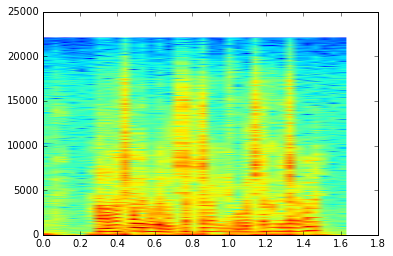

In [9]:
import pylab
from scipy.io import wavfile

fs, frames = wavfile.read("/Users/kevinli/src/AY250_2016/python-seminar/Homeworks/attic_2013_homework/hw_0_data/voice.wav")

channels = [
    np.array(frames)
    #np.array(frames[:, 0]),
    #np.array(frames[:, 1])
]

# generate specgram
Pxx, freqs, t, plot = pylab.specgram(
    channels[0],
    NFFT=4096, 
    Fs=44100, 
    detrend=pylab.detrend_none,
    window=pylab.window_hanning,
    noverlap=int(4096 * 0.5))

**Problem 2**: Write a function to compress a 1-d signal by dropping a fraction of its spectrum. 

You can drop the smallest components by setting their values to zero.

*Hints*: 

- look at the `np.fft` module, keeping in mind that your input signal is real.
- look at the `argsort` method of numpy arrays.

In [10]:
frames.shape

(73728,)

In [18]:
import numpy as np

In [22]:
from numpy import fft

In [62]:
def compress_signal(x, fraction):
    """Compress an input signal by dropping a fraction of its spectrum.
    
    Parameters
    ==========
    x : array
      1-d real array to be compressed
      
    fraction : float
      A number in the [0,1] range indicating which fraction of the spectrum
      of x should be zeroed out (1 means zero out the entire signal).
      
    Returns
    =======
    x_approx : array
      1-d real array reconstructed after having compressed the input.
    """
     # your code here
    xfft = fft.rfft(x)
    lbnd = np.percentile(xfft, fraction*100)
    #result = ma.masked_array(x, mask = (x <= lbnd), fill_value = 0)
    result = xfft * (xfft >= lbnd)
    result = fft.irfft(result)
    return result

As a quick visual check (not that this is *not* a formal test of correctness), experiment with a simple random signal by changing the compression ratio and plotting both the signal and the compressed version:

In [63]:
x = np.random.rand(128)

In [64]:
y = fft.fft(x)
z = fft.ifft(y)

In [65]:
print(z.astype(int))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


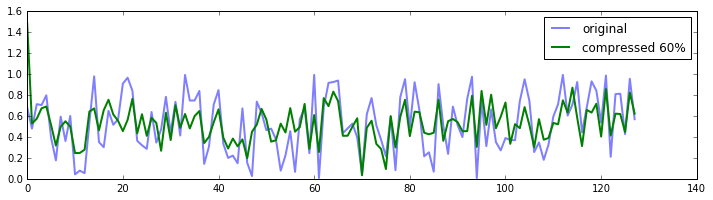

In [66]:
fraction = 0.6  # play changing this in the 0-1 range

xa = compress_signal(x, fraction)

plt.figure(figsize=(12,3))
plt.plot(x, alpha=0.5, lw=2, label='original')
plt.plot(xa, lw=2, label='compressed {0:.0%}'.format(fraction))
plt.legend();

**Problem 3**: Write a function that will compress an audio file by a dropping a fraction of its spectrum, writing the output to a new file.

If the input file is named `a.wav` and the compression fraction is 0.9, the output file should be named `a_comp_0.9.wav`.

*Hints:* 

- look at the `scipy.io` module for routines dealing with files in `wav` format.

- you may need to use the `astype` method of numpy arrays to get the correct data type for `wav` files.

In [91]:
def compress_wav(fname, fraction):
    """Compress an audio signal stored in an input wav file.
    
    The compressed signal is returned as a numpy array and automatically written 
    to disk to a new wav file.
    
    Parameters
    ==========
    fname : string
      Name of the input wav file
      
    fraction : float
      Fraction of input data to keep.
      
    Returns
    =======
    rate : int
      Bit rate of the input signal.

    x : array
      Raw data of the original input signal.
      
    x_approx : array
      Raw data of the compressed signal.
      
    new_fname : string
      Auto-generated filename of the compressed signal.
    """
    
    # your code here
    rate, frames = wavfile.read(fname)
    x = np.array(frames)
    z = compress_signal(x, fraction)
    x_approx = z.astype("int16")
    fname = 'Input1'
    new_fname = fname + '_' + str(fraction) + ".wav" 
    wavfile.write(new_fname, rate, x_approx)
    return([rate, x, x_approx, new_fname])

**Problem 4**: Study the effect of compressing the input file at different ratios: 0.1, 0.5, 0.75, 0.9, 0.95, 0.99.

Using the `OrderedDict` class from the [Python collections module](http://docs.python.org/2/library/collections.html#collections.OrderedDict), store the uncompressed signal as well as the compressed array and filename for each compression ratio.

You will create an `OrderedDict` called `voices`, with:

- keys: compression ratios
- values: pairs of (x, filename) where x is the compressed audio and filename is the name of the compressed file.

In [92]:
# your code here
from collections import OrderedDict
comp_ratios = [0, 0.1, 0.5, 0.75, 0.9, 0.95, 0.99]
compressed_files = OrderedDict() # Initialization
for i in comp_ratios:
    compressed_files[i] = compress_wav("hw_0_data/voice.wav", i)

**Problem 5**: Loop over the `voices` dict, and for each one generate an audio player as well as a spectrogram.  Observe how the spectrogram changes, and listen to each file.  At what ratio do you stop understanding the recording?

In [93]:
!ls

Input1_0              Input1_0.8            Input1_0.wav
Input1_0.1            Input1_0.9            data
Input1_0.1.wav        Input1_0.9.wav        hw1_data
Input1_0.5            Input1_0.95           hw_0_data
Input1_0.5.wav        Input1_0.95.wav       hw_1_assignment.ipynb
Input1_0.75           Input1_0.99           input1_new
Input1_0.75.wav       Input1_0.99.wav


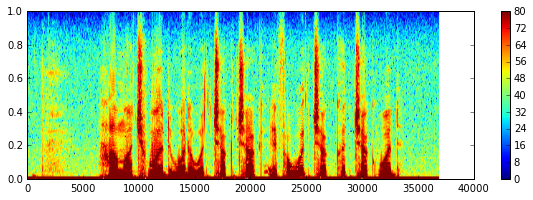

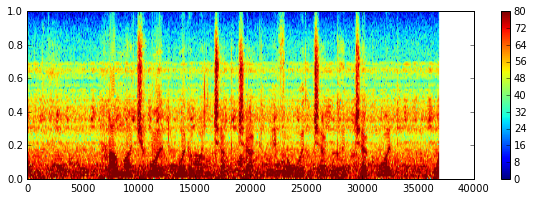

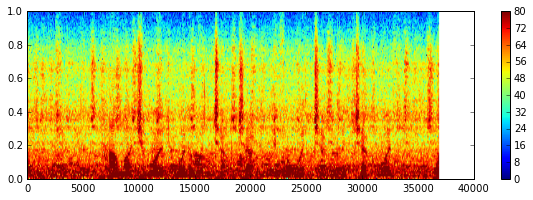

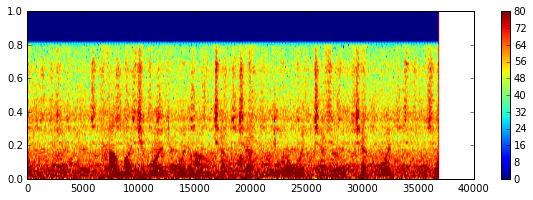

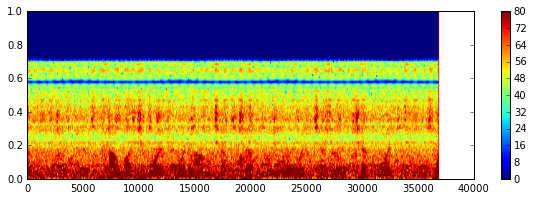

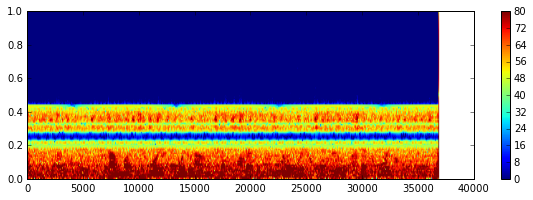

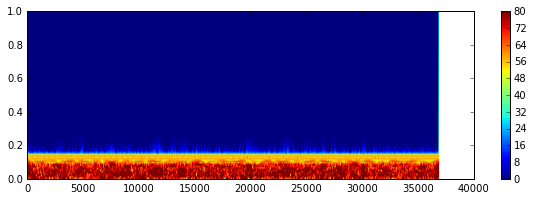

In [94]:
for i in compressed_files:
    Audio(compressed_files[i][3]) 
    specgram_cbar(compressed_files[i][2])

I only fail to understand after the compression ratio is 0.99

In [89]:
!ls

Input1_0              Input1_0.9            hw_0_data
Input1_0.1            Input1_0.95           hw_1_assignment.ipynb
Input1_0.5            Input1_0.99           input1_new
Input1_0.75           data
Input1_0.8            hw1_data


# #3: Armchair Astronomer

Often times, people act as good sensors of the physical universe. We can use Google Trends data to help us determine some fundamental parameters of the Solar System.

**Problem 1**: Using just the CSV file we created in the pandas lecture (`merged_data.csv`) and some frequency analysis tools in `scipy` to determine:

   - the number of days in a year
   - the period of the moon's orbit around the Earth
   
Hint: `from scipy.signal.spectral import lombscargle`

In [101]:
import numpy as np
import pandas as pd  ## this is by convention
pd.options.display.width = 1000

In [102]:
# your code here
!ls data/

im2-1.png       merged_data.csv


In [107]:
df = pd.read_csv("data/merged_data.csv")

In [108]:
df.head()

,Week,ice cream,Volleyball,tennis,full moon
0,2011-09-03,25,18,83,26
1,2011-09-10,21,18,58,50
2,2011-09-17,20,18,25,14
3,2011-09-24,21,18,24,17
4,2011-10-01,20,18,24,21


In [109]:
df['Week'] = pd.to_datetime(df['Week'])

In [106]:
df.set_index('Week', inplace = False)

,ice cream,Volleyball,tennis,full moon
Week,,,,
2011-09-03,25,18,83,26
2011-09-10,21,18,58,50
2011-09-17,20,18,25,14
2011-09-24,21,18,24,17
2011-10-01,20,18,24,21
2011-10-08,20,18,23,55
2011-10-15,27,19,22,13
2011-10-22,21,21,21,16
2011-10-29,19,22,20,17


In [90]:
df

,Week,ice cream,Volleyball,tennis,full moon
0,2011-09-03,25,18,83,26
1,2011-09-10,21,18,58,50
2,2011-09-17,20,18,25,14
3,2011-09-24,21,18,24,17
4,2011-10-01,20,18,24,21
5,2011-10-08,20,18,23,55
6,2011-10-15,27,19,22,13
7,2011-10-22,21,21,21,16
8,2011-10-29,19,22,20,17
9,2011-11-05,19,22,21,56


In [125]:
x = np.array(df['Week'])
y = np.array(df['full moon'], dtype=float)


In [95]:
date = pd.to_datetime(df['Week'])

In [155]:
date[0]

Timestamp('2011-09-03 00:00:00')

In [96]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [97]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

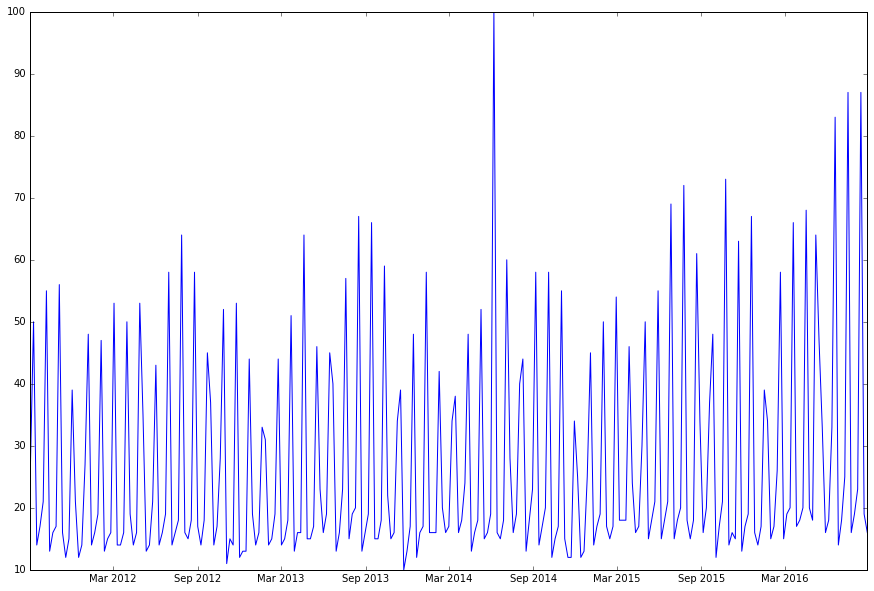

In [98]:
plot(date, df['full moon'])

In [98]:
from scipy.signal.spectral import lombscargle

In [99]:
import astropy.stats

In [100]:
df['ice cream'].shape[0]

NameError: name 'df' is not defined

### Periodicity of Ice Cream, Volleyball and Tennis

In [110]:
day_to_seconds = 24*3600.0
timesteps = np.arange(df['ice cream'].shape[0])*day_to_seconds*7
len(timesteps) # Making sure the timesteps is the same size as the pd.series

261

In [111]:
periods = np.linspace(100*day_to_seconds, 500*day_to_seconds, 10000) # controlling for the search space
periods

array([  8640000.        ,   8643456.34563456,   8646912.69126913, ...,
        43193087.30873087,  43196543.65436544,  43200000.        ])

In [112]:
freq = 1.0/periods * 2 * pi
freq

array([  7.27220522e-07,   7.26929721e-07,   7.26639152e-07, ...,
         1.45467381e-07,   1.45455742e-07,   1.45444104e-07])

In [115]:
df.columns

Index(['Week', 'ice cream', 'Volleyball', 'tennis', 'full moon'], dtype='object')

In [116]:
ice_cream = np.array(df['ice cream'])
vball = np.array(df['Volleyball'])
tennis = np.array(df['tennis'])

In [143]:
pgram_ic = lombscargle(timesteps.astype('float64'), ice_cream.astype('float64'), freq)
pgram_vb = lombscargle(timesteps.astype('float64'), vball.astype('float64'), freq)
pgram_t = lombscargle(timesteps.astype('float64'), tennis.astype('float64'), freq)

# ------------- Printing out all the corresponding results - periodicity -------------------- #
print("The periodicity of the searches for ice cream is: ", 1/(freq[np.argmax(pgram_ic)]/2/pi)/day_to_seconds)
print("The periodicity of the searches for volleyball is: ", 1/(freq[np.argmax(pgram_vb)]/2/pi)/day_to_seconds)
print("The periodicity of the searches for tennis is: ", 1/(freq[np.argmax(pgram_t)]/2/pi)/day_to_seconds)

The periodicity of the searches for ice cream is:  359.945994599
The periodicity of the searches for volleyball is:  351.465146515
The periodicity of the searches for tennis is:  352.345234523


### Answer:
We can see that the periodicity of queries for the 3 terms are roughly in the range of a year.
However, the same is not true for queries/searches for the term "full moon"

In [156]:
# A bad attempt
day_to_seconds = 24 * 3600.0
timesteps = np.arange(df['full moon'].shape[0]) * day_to_seconds * 7
#periods = np.linspace(10 * day_to_seconds, 50 * day_to_seconds, 10000) 
periods = np.linspace(100*day_to_seconds, 500*day_to_seconds, 10000) # controlling for the search space
periods
freq = 1.0/periods * 2 * pi
pgram_fm = lombscargle(timesteps.astype('float64'), full_moon.astype('float64') , freq)
print(1/(freq[np.argmax(pgram_fm)]/2/pi)/day_to_seconds)

337.783778378


In [160]:
day_to_seconds = 24 * 3600.0
timesteps = np.arange(df['full moon'].shape[0]) * day_to_seconds * 7
periods = np.linspace(15 * day_to_seconds, 60 * day_to_seconds, 10000) 
freq = 1.0/periods * 2 * pi
pgram_fm = lombscargle(timesteps.astype('float64'), full_moon.astype('float64') , freq)
print(1/(freq[np.argmax(pgram_fm)]/2/pi)/day_to_seconds)

29.5319531953


#### Answer: 
Without restricting the search space to between 15 and 60 days, we would get a nonsensical solution such as 338 days but as we can see in the cell immediately above, by restrciting the search space, we are able to see that a proper cycle of 29.5 days are between each full moon. 

# #4: Reproducing some insights about the Election

Nate ("not a genius, just a Bayesian") Silver writes often about polls and their utility of predicting elections. One of the things he emphasized during the 2016 campaign is that even "large" polls of people with a consistent lead for one candidate will show wild swings in any given window in time.

**Problem 1**: Using Pandas and `numpy`, try to reproduce this plot from a Nate Silve Tweet qualitatively using the same assumptions.

<img src="https://www.evernote.com/l/AUU-KkH3Z-lBdKokzCzVIUe53YZLQ9e_AuMB/image.png">

https://twitter.com/NateSilver538/status/769565612955824128

In [10]:
# your code here
import numpy as np
import pandas as pd
import datetime

In [72]:
np.random.normal?

In [164]:
np.random.seed(5) # seed of prng to make sure result is reproducible
n = 200 # number of trails
p = .53 # probability that each person interviewed is a Clinton Supporter
s = np.random.binomial(n, p, 6*30)  # generated sample 
#s = np.random.normal(loc = p , size = 180)

In [57]:
len(s)

180

In [58]:
s

array([112, 113, 102, 101, 114,  97,  94, 100, 102, 100, 115,  86, 108,
       113, 113, 110, 112, 103, 106, 107,  91,  98,  98, 103, 107, 100,
       101,  97, 109, 106,  97,  96, 106,  99, 100, 107, 104, 103, 120,
       108,  99, 102,  98, 103, 108, 111,  99, 108, 115, 104, 118, 118,
       112, 113, 109, 100,  92,  97, 106, 100, 103,  96, 107, 107, 101,
       108, 115, 101,  98, 103, 104, 114, 102,  96, 103, 116, 121, 103,
        99, 108, 117, 112, 103, 108, 109, 107,  97, 112, 100, 113, 110,
       105, 111, 103, 102, 105, 110, 105, 110,  95, 100, 116, 108, 123,
       112, 102, 101, 117,  93, 111, 107, 112,  98,  95, 109, 111, 100,
       100, 106, 111, 109, 105,  95,  99, 101, 102, 108, 108, 113,  98,
       105, 116, 114, 109, 103,  94, 101, 109, 125, 116, 100, 103, 107,
        94, 100,  95, 102, 107, 110,  96, 115, 114,  98, 102, 104, 114,
       110, 108, 113, 105, 109, 104, 105, 116, 105, 104, 111, 109, 107,
       103, 112,  97, 104,  94, 105, 115, 112, 111, 115, 106])

In [170]:
ra = np.empty(len(s)-5) # Initialization of the rolling averages
for i in range(5,len(s)):
    ra[(i-5)] = (np.sum(s[i-5:i]))/1000 - 0.5
    

In [171]:
ra_perc = str(ra)

In [166]:
base = datetime.datetime(2016, 6, 1)
base

datetime.datetime(2016, 6, 1, 0, 0)

In [167]:
date_list = [base + datetime.timedelta(days=x) for x in range(5, len(s))]
date_list

[datetime.datetime(2016, 6, 6, 0, 0),
 datetime.datetime(2016, 6, 7, 0, 0),
 datetime.datetime(2016, 6, 8, 0, 0),
 datetime.datetime(2016, 6, 9, 0, 0),
 datetime.datetime(2016, 6, 10, 0, 0),
 datetime.datetime(2016, 6, 11, 0, 0),
 datetime.datetime(2016, 6, 12, 0, 0),
 datetime.datetime(2016, 6, 13, 0, 0),
 datetime.datetime(2016, 6, 14, 0, 0),
 datetime.datetime(2016, 6, 15, 0, 0),
 datetime.datetime(2016, 6, 16, 0, 0),
 datetime.datetime(2016, 6, 17, 0, 0),
 datetime.datetime(2016, 6, 18, 0, 0),
 datetime.datetime(2016, 6, 19, 0, 0),
 datetime.datetime(2016, 6, 20, 0, 0),
 datetime.datetime(2016, 6, 21, 0, 0),
 datetime.datetime(2016, 6, 22, 0, 0),
 datetime.datetime(2016, 6, 23, 0, 0),
 datetime.datetime(2016, 6, 24, 0, 0),
 datetime.datetime(2016, 6, 25, 0, 0),
 datetime.datetime(2016, 6, 26, 0, 0),
 datetime.datetime(2016, 6, 27, 0, 0),
 datetime.datetime(2016, 6, 28, 0, 0),
 datetime.datetime(2016, 6, 29, 0, 0),
 datetime.datetime(2016, 6, 30, 0, 0),
 datetime.datetime(2016, 7, 1

Populating the interactive namespace from numpy and matplotlib


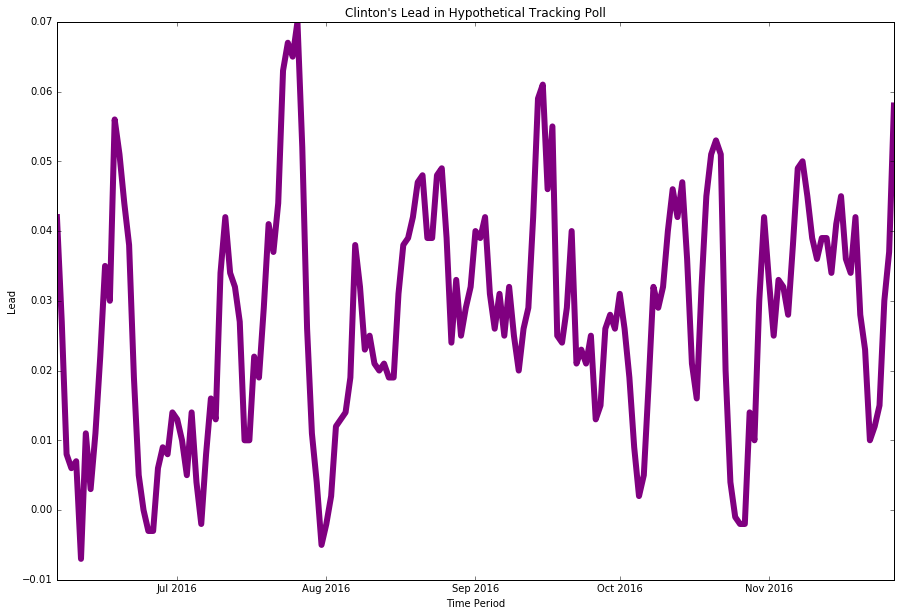

In [172]:
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
ax = plt.plot(date_list, pd.DataFrame(ra), '#800080', linewidth=6)
plt.title('Clinton\'s Lead in Hypothetical Tracking Poll')
plt.xlabel('Time Period')
plt.ylabel('Lead')
#vals = ax.get_yticks()
#vals = ax.
#ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])

**Problem 2**: Clearly, even with a 6% point lead, there's a chance that this sort of poll would show the other person in the lead. How much would ahead (in percent) would a candidate need to be to have a tracking poll never show the other candidate to be ahead over the course of a year (in your simulation)?

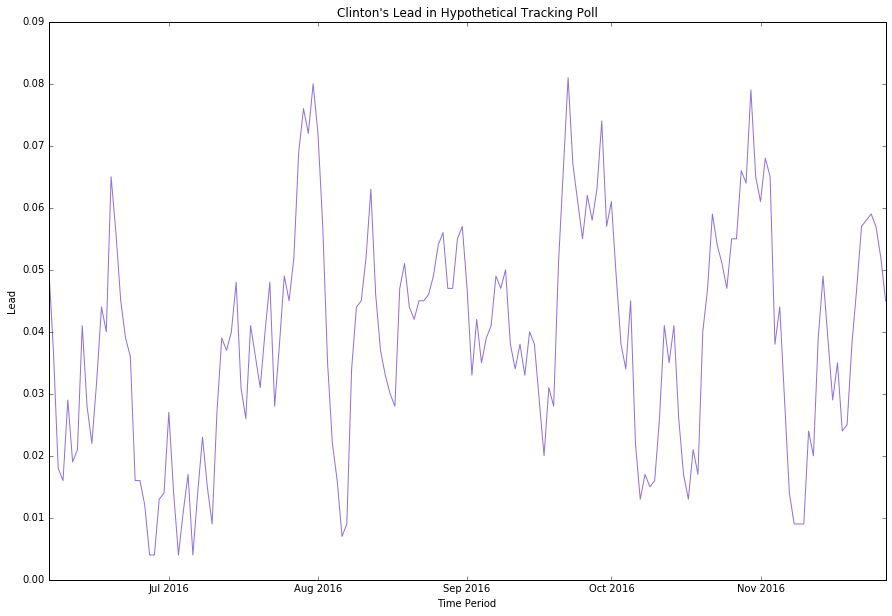

In [75]:
# your code here
# Recreating the same experiment
np.random.seed(5) # seed of prng to make sure result is reproducible
n = 200 # number of trails
lead = 0.04
p = .5 + lead # probability that each person interviewed is a Clinton Supporter
s = np.random.binomial(n, p, 6*30)  # generated sample 
#s = np.random.normal(loc = p , size = 180)
ra = np.empty(len(s)-5) # Initialization of the rolling averages
for i in range(5,len(s)):
    ra[(i-5)] = (np.sum(s[i-5:i]))/1000 - 0.5
base = datetime.datetime(2016, 6, 1)
date_list = [base + datetime.timedelta(days=x) for x in range(5, len(s))]
ax = plt.plot(date_list, pd.DataFrame(ra), '#9370DB')
plt.title('Clinton\'s Lead in Hypothetical Tracking Poll')
plt.xlabel('Time Period')
plt.ylabel('Lead')

For the seed I selected, a 4% lead already prevented Trump from leading Hillary Clinton.

This is clearly not a satisfactory way of analyzing the problem and we can do much better by conducting a simulation study with multiple runs. 
Let's set a threshold to see how much of a lead does Hillary need to always stay ahead in 95% of the runs.


In [176]:
range(0, 10, 100)

range(0, 10, 100)

In [185]:
for lead in range(3, 10):
    lead = lead/100
    count = 0
    success = False
    for i in range(0, 100):
        n = 200 # number of trails
        p = .5 + lead # probability that each person interviewed is a Clinton Supporter
        s = np.random.binomial(n, p, 6*30)  # generated sample 
        #s = np.random.normal(loc = p , size = 180)
        ra = np.empty(len(s)-5) # Initialization of the rolling averages
        for i in range(5,len(s)):
            ra[(i-5)] = (np.sum(s[i-5:i]))/1000 - 0.5
        base = datetime.datetime(2016, 6, 1)
        date_list = [base + datetime.timedelta(days=x) for x in range(5, len(s))]
        if(min(ra)<0):
            count += 1
        #ax = plt.plot(date_list, pd.DataFrame(ra), '#9370DB')
        #plt.title('Clinton\'s Lead in Hypothetical Tracking Poll')
        #plt.xlabel('Time Period')
        #plt.ylabel('Lead')
    in_the_lead = 1 - (count/100)
    if in_the_lead > 0.95:
        success = True
    print("When lead is ", lead, " the chance of the minimum of the  rolling average to be non-negative is: " , in_the_lead, 
          "and it is ", success, " that we have a 95% chance of showing a lead in the entire period")

When lead is  0.03  the chance of the minimum of the  rolling average to be non-negative is:  0.06999999999999995 and it is  False  that we have a 95% chance of showing a lead in the entire period
When lead is  0.04  the chance of the minimum of the  rolling average to be non-negative is:  0.53 and it is  False  that we have a 95% chance of showing a lead in the entire period
When lead is  0.05  the chance of the minimum of the  rolling average to be non-negative is:  0.97 and it is  True  that we have a 95% chance of showing a lead in the entire period
When lead is  0.06  the chance of the minimum of the  rolling average to be non-negative is:  0.98 and it is  True  that we have a 95% chance of showing a lead in the entire period
When lead is  0.07  the chance of the minimum of the  rolling average to be non-negative is:  1.0 and it is  True  that we have a 95% chance of showing a lead in the entire period
When lead is  0.08  the chance of the minimum of the  rolling average to be non

**Problem 3**: With a 3 and 6% lead, how many people would need to be polled in 1 day to have the rolling 5-day poll result always show the leader ahead (over a year)?

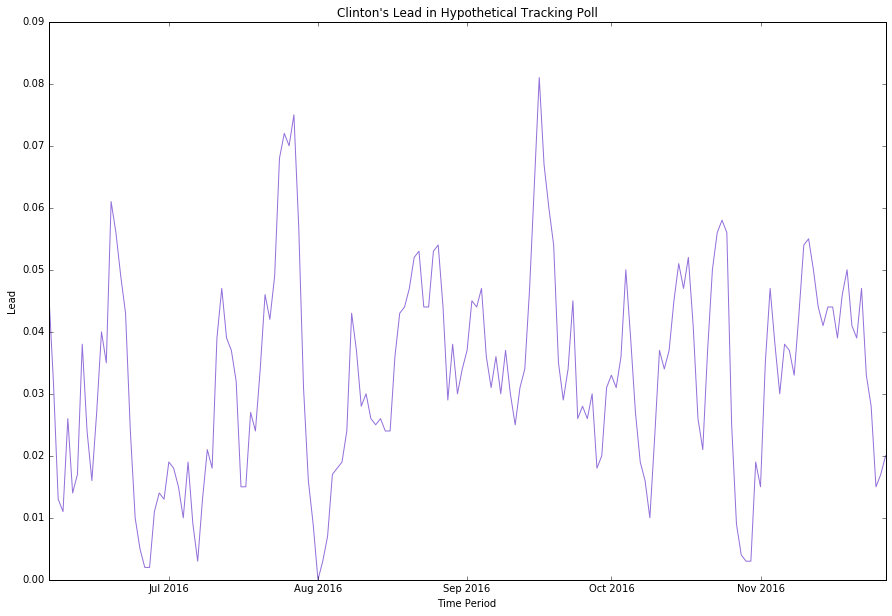

In [79]:
# your code here
# Recreating the same experiment
np.random.seed(5) # seed of prng to make sure result is reproducible
n = 202 # number of trails
lead = 0.03
p = .5 + lead # probability that each person interviewed is a Clinton Supporter
s = np.random.binomial(n, p, 6*30)  # generated sample 
#s = np.random.normal(loc = p , size = 180)
ra = np.empty(len(s)-5) # Initialization of the rolling averages
for i in range(5,len(s)):
    ra[(i-5)] = (np.sum(s[i-5:i]))/1000 - 0.5
base = datetime.datetime(2016, 6, 1)
date_list = [base + datetime.timedelta(days=x) for x in range(5, len(s))]
ax = plt.plot(date_list, pd.DataFrame(ra), '#9370DB')
plt.title('Clinton\'s Lead in Hypothetical Tracking Poll')
plt.xlabel('Time Period')
plt.ylabel('Lead')

With a 3% lead, a daily sample of 202 was sufficient when we conside merely one run. In the following section, we repeat the simulation over multiple runs. 

In [191]:
for n in range(200, 250):
    lead = 0.03
    count = 0
    success = False
    for i in range(0, 100):
        #n = 200 # number of trails
        p = .5 + lead # probability that each person interviewed is a Clinton Supporter
        s = np.random.binomial(n, p, 12*30)  # generated sample 
        #s = np.random.normal(loc = p , size = 180)
        ra = np.empty(len(s)-5) # Initialization of the rolling averages
        for i in range(5,len(s)):
            ra[(i-5)] = (np.sum(s[i-5:i]))/1000 - 0.5
        base = datetime.datetime(2016, 6, 1)
        date_list = [base + datetime.timedelta(days=x) for x in range(5, len(s))]
        if(min(ra)<0):
            count += 1
        #ax = plt.plot(date_list, pd.DataFrame(ra), '#9370DB')
        #plt.title('Clinton\'s Lead in Hypothetical Tracking Poll')
        #plt.xlabel('Time Period')
        #plt.ylabel('Lead')
    in_the_lead = 1 - (count/100)
    if in_the_lead > 0.99:
        success = True
    print("When n is ", n, " the chance of the minimum of the  rolling average to be non-negative is: " , in_the_lead, 
          "and it is ", success, " that we have a 99% chance of showing a lead in the entire period")

When n is  200  the chance of the minimum of the  rolling average to be non-negative is:  0.0 and it is  False  that we have a 99% chance of showing a lead in the entire period
When n is  201  the chance of the minimum of the  rolling average to be non-negative is:  0.010000000000000009 and it is  False  that we have a 99% chance of showing a lead in the entire period
When n is  202  the chance of the minimum of the  rolling average to be non-negative is:  0.06999999999999995 and it is  False  that we have a 99% chance of showing a lead in the entire period
When n is  203  the chance of the minimum of the  rolling average to be non-negative is:  0.17000000000000004 and it is  False  that we have a 99% chance of showing a lead in the entire period
When n is  204  the chance of the minimum of the  rolling average to be non-negative is:  0.31999999999999995 and it is  False  that we have a 99% chance of showing a lead in the entire period
When n is  205  the chance of the minimum of the  

With 100 trials, w eneed roughly 215 runs to have a 99% confidece that the lead is visible through 1 year.

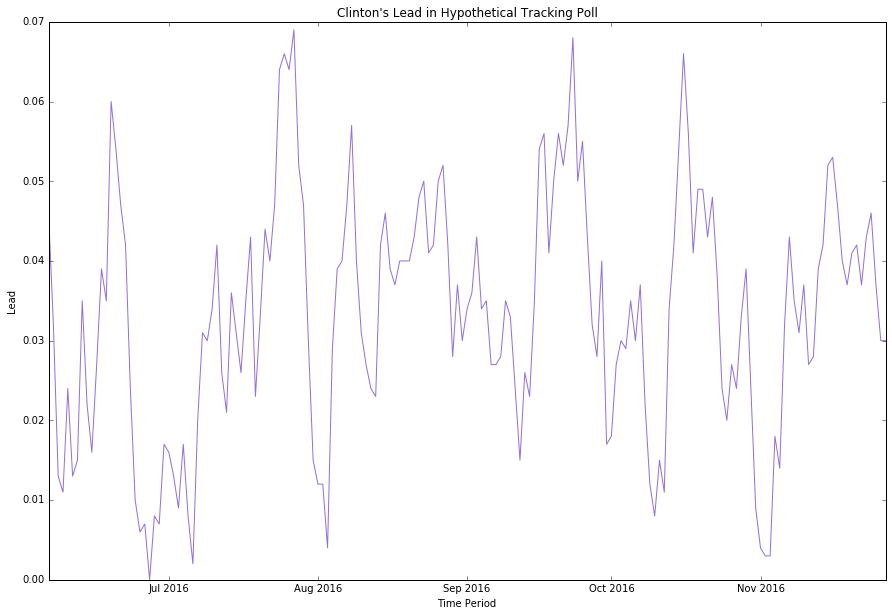

In [83]:
# your code here
# your code here
# Recreating the same experiment
np.random.seed(5) # seed of prng to make sure result is reproducible
n = 191 # number of trails
lead = 0.06
p = .5 + lead # probability that each person interviewed is a Clinton Supporter
s = np.random.binomial(n, p, 6*30)  # generated sample 
#s = np.random.normal(loc = p , size = 180)
ra = np.empty(len(s)-5) # Initialization of the rolling averages
for i in range(5,len(s)):
    ra[(i-5)] = (np.sum(s[i-5:i]))/1000 - 0.5
base = datetime.datetime(2016, 6, 1)
date_list = [base + datetime.timedelta(days=x) for x in range(5, len(s))]
ax = plt.plot(date_list, pd.DataFrame(ra), '#9370DB')
plt.title('Clinton\'s Lead in Hypothetical Tracking Poll')
plt.xlabel('Time Period')
plt.ylabel('Lead')

With a 6% lead, a sample size of 191 daily samples was sufficient to make sure the true leader was leading in the polls when 1 run. We repeat it with multiple runs in the following cell.

In [193]:
for n in range(190, 220):
    lead = 0.06
    count = 0
    success = False
    for i in range(0, 100):
        #n = 200 # number of trails
        p = .5 + lead # probability that each person interviewed is a Clinton Supporter
        s = np.random.binomial(n, p, 12*30)  # generated sample 
        #s = np.random.normal(loc = p , size = 180)
        ra = np.empty(len(s)-5) # Initialization of the rolling averages
        for i in range(5,len(s)):
            ra[(i-5)] = (np.sum(s[i-5:i]))/1000 - 0.5
        base = datetime.datetime(2016, 6, 1)
        date_list = [base + datetime.timedelta(days=x) for x in range(5, len(s))]
        if(min(ra)<0):
            count += 1
        #ax = plt.plot(date_list, pd.DataFrame(ra), '#9370DB')
        #plt.title('Clinton\'s Lead in Hypothetical Tracking Poll')
        #plt.xlabel('Time Period')
        #plt.ylabel('Lead')
    in_the_lead = 1 - (count/100)
    if in_the_lead > 0.99:
        success = True
    print("When n is ", n, " the chance of the minimum of the  rolling average to be non-negative is: " , in_the_lead, 
          "and it is ", success, " that we have a 99% chance of showing a lead in the entire period")

When n is  190  the chance of the minimum of the  rolling average to be non-negative is:  0.030000000000000027 and it is  False  that we have a 99% chance of showing a lead in the entire period
When n is  191  the chance of the minimum of the  rolling average to be non-negative is:  0.10999999999999999 and it is  False  that we have a 99% chance of showing a lead in the entire period
When n is  192  the chance of the minimum of the  rolling average to be non-negative is:  0.21999999999999997 and it is  False  that we have a 99% chance of showing a lead in the entire period
When n is  193  the chance of the minimum of the  rolling average to be non-negative is:  0.42000000000000004 and it is  False  that we have a 99% chance of showing a lead in the entire period
When n is  194  the chance of the minimum of the  rolling average to be non-negative is:  0.5700000000000001 and it is  False  that we have a 99% chance of showing a lead in the entire period
When n is  195  the chance of the m

With 100 runs, we see that we need roughly 205 runs to guarantee that the lead is visible throughout the year.

I discussed this homework with Shiman Ding and Tugce Gurek.